<a href="https://colab.research.google.com/github/Bast-94/CYBERML-Project/blob/data-set/cyber-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Cyber Security Project

In [2]:
import pandas as pd
import numpy as np
import os
import sys
from mlsecu.anomaly_detection_use_case import *
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Prepare Data

### Loading dataset

In [3]:
dataset_path = './data/SWaT.A3_dataset_Jul 19_labelled.xlsx'
df = pd.read_excel(dataset_path, header=1)

In [4]:
df.head()

,GMT +0,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,timestamp,NaN,NaN,value,value,value,value,value,value,value,...,value,value,value,value,value,value,value,value,value,value
1,2019-07-20T04:30:00Z,NaN,NaN,0,729.8658,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
2,2019-07-20T04:30:01Z,NaN,NaN,0,729.434,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
3,2019-07-20T04:30:02.004013Z,NaN,NaN,0,729.12,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
4,2019-07-20T04:30:03.004013Z,NaN,NaN,0,728.6882,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1


### Cleaning data

In order to work easier on our dataset we need to clean it properly.

In [6]:
full_df = df.drop([0])
full_df = full_df.reset_index(drop=True)
full_df = full_df.rename(columns={'GMT +0':'Date'})
full_df['Attack'] = full_df['Attack'].fillna('benign')
full_df['Label'] = full_df['Label'].fillna(0).astype(int)
full_df['Date'] = pd.to_datetime(full_df['Date'])
full_df.to_csv('./data/SWaT.A3_dataset_Jul_19_labelled.csv')
full_df.head()

,Date,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,2019-07-20 04:30:00+00:00,benign,0,0,729.8658,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
1,2019-07-20 04:30:01+00:00,benign,0,0,729.434,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
2,2019-07-20 04:30:02.004013+00:00,benign,0,0,729.12,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
3,2019-07-20 04:30:03.004013+00:00,benign,0,0,728.6882,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
4,2019-07-20 04:30:04+00:00,benign,0,0,727.7069,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1


In [7]:
# how many columns are there?
len(full_df.columns)

80

<Axes: >

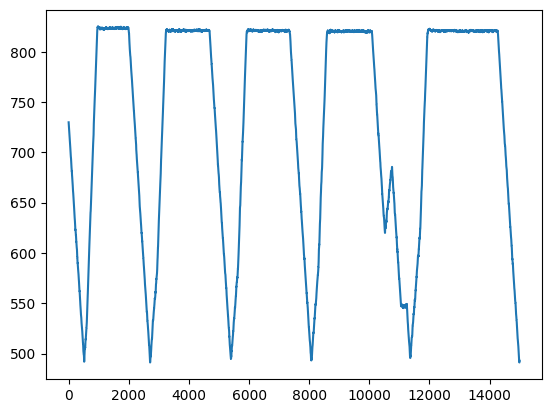

In [8]:
# affiche la colonne LIT 101
full_df['LIT 101'].plot()

In [9]:
# get unique labels
labels = full_df['Attack'].unique()
labels

array(['benign', 'Spoofing', 'Switch_ON', 'Switch_close', 'Switch_off'],
      dtype=object)

In [41]:
# we print the values in each column that has only one unique value
for col in full_df.columns:
    if (len(full_df[col].unique()) == 1):
        print(col, full_df[col].unique())

P102 Status [1]
LS 201 ["{u'IsSystem': False, u'Name': u'Inactive', u'Value': 0}"]
LS 202 ["{u'IsSystem': False, u'Name': u'Inactive', u'Value': 0}"]
LSL 203 ["{u'IsSystem': False, u'Name': u'Inactive', u'Value': 0}"]
LSLL 203 ["{u'IsSystem': False, u'Name': u'Inactive', u'Value': 0}"]
P2_STATE [2]
P201 Status [1]
P202 Status [1]
P204 Status [1]
P206 Status [1]
P207 Status [1]
P208 Status [1]
P302 Status [1]
AIT 401 [0]
LS 401 ["{u'IsSystem': False, u'Name': u'Inactive', u'Value': 0}"]
P4_STATE [4]
P402 Status [1]
P403 Status [1]
P404 Status [1]
MV 502 [2]
MV 503 [1]
MV 504 [1]
P5_STATE [12]
P501 Status [2]
P502 Status [1]
LSH 602 ["{u'IsSystem': False, u'Name': u'Active', u'Value': 1}"]
LSH 603 ["{u'IsSystem': False, u'Name': u'Inactive', u'Value': 0}"]
LSL 601 ["{u'IsSystem': False, u'Name': u'Inactive', u'Value': 0}"]
LSL 602 ["{u'IsSystem': False, u'Name': u'Inactive', u'Value': 0}"]
LSL 603 ["{u'IsSystem': False, u'Name': u'Active', u'Value': 1}"]
P6 STATE [2]
P602 Status [1]
P603

In [10]:
# y a t il des colonnes ou les valeurs sont toutes les memes?
for col in full_df.columns:
    if len(full_df[col].unique()) == 1:
        print(col)

P102 Status
LS 201
LS 202
LSL 203
LSLL 203
P2_STATE
P201 Status
P202 Status
P204 Status
P206 Status
P207 Status
P208 Status
P302 Status
AIT 401
LS 401
P4_STATE
P402 Status
P403 Status
P404 Status
MV 502
MV 503
MV 504
P5_STATE
P501 Status
P502 Status
LSH 602
LSH 603
LSL 601
LSL 602
LSL 603
P6 STATE
P602 Status
P603 Status


Supprimons les colonnes qui contiennent une seule valeur, car elles ne sont pas utiles pour la classification.

On en compte finalement 33.


In [11]:
# on supprime les colonnes qui ont une seule valeur dans un nouveau dataframe
df_cleaned = full_df.copy()
for col in full_df.columns:
    if len(full_df[col].unique()) == 1:
        df_cleaned = df_cleaned.drop(columns=[col])

In [12]:
df_cleaned.shape

(14996, 47)

In [13]:
df_cleaned.head()

,Date,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,AIT 201,AIT 202,...,FIT 502,FIT 503,FIT 504,MV 501,PIT 501,PIT 502,PIT 503,FIT 601,LSH 601,P601 Status
0,2019-07-20 04:30:00+00:00,benign,0,0,729.8658,1,3,2,142.527557,9.293002,...,0.310362,0.623628,0.213432,2,167.601257,2.963509,119.921173,0.00032,"{u'IsSystem': False, u'Name': u'Active', u'Val...",1
1,2019-07-20 04:30:01+00:00,benign,0,0,729.434,1,3,2,142.527557,9.293002,...,0.315102,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,"{u'IsSystem': False, u'Name': u'Active', u'Val...",1
2,2019-07-20 04:30:02.004013+00:00,benign,0,0,729.12,1,3,2,142.527557,9.293002,...,0.317023,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,"{u'IsSystem': False, u'Name': u'Active', u'Val...",1
3,2019-07-20 04:30:03.004013+00:00,benign,0,0,728.6882,1,3,2,142.527557,9.289157,...,0.308057,0.623628,0.212792,2,167.601257,2.963509,119.921173,0.00032,"{u'IsSystem': False, u'Name': u'Active', u'Val...",1
4,2019-07-20 04:30:04+00:00,benign,0,0,727.7069,1,3,2,142.527557,9.289157,...,0.303446,0.623628,0.214009,2,167.601257,2.963509,119.921173,0.00032,"{u'IsSystem': False, u'Name': u'Active', u'Val...",1


## LSTM Model and RMS-deviation

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Data preparation

Our LSTM must take a specific shape of data. We need to reshape our data in order to fit the model.

Here our dataset has a shape of (14996,49). We know that the LSTM works better with 200-400 time steps per sample. We will use 300 time steps per sample.

15 000 / 60 = 250 samples

Let's have 49 samples with 300 time steps each and the last one with 296 time steps.

n_samples = 250
time_steps = 60
features = 49

In [61]:
is_float = lambda x: isinstance(x, float)
for col in df_cleaned.columns:
  if col == 'Date':
    continue

  if df_cleaned[col].apply(pd.to_numeric, errors='coerce').notna().all():
    df_cleaned[col] = df_cleaned[col].apply(pd.to_numeric, errors='coerce')

In [62]:
df_cleaned.dtypes

Date           datetime64[ns, UTC]
Attack                      object
Label                        int64
FIT 101                    float64
LIT 101                    float64
MV 101                       int64
P1_STATE                     int64
P101 Status                  int64
AIT 201                    float64
AIT 202                    float64
AIT 203                    float64
FIT 201                    float64
MV201                        int64
P203 Status                  int64
P205 Status                  int64
AIT 301                    float64
AIT 302                    float64
AIT 303                    float64
DPIT 301                   float64
FIT 301                    float64
LIT 301                    float64
MV 301                       int64
MV 302                       int64
MV 303                       int64
MV 304                       int64
P3_STATE                     int64
P301 Status                  int64
AIT 402                    float64
FIT 401             

In [63]:
# format the data for LSTM like this [samples, time steps, features]
features = df_cleaned.drop(['Date', 'Attack', 'Label', "LSH 601"], axis=1)
labels = df_cleaned['Label']

# Normalisation
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

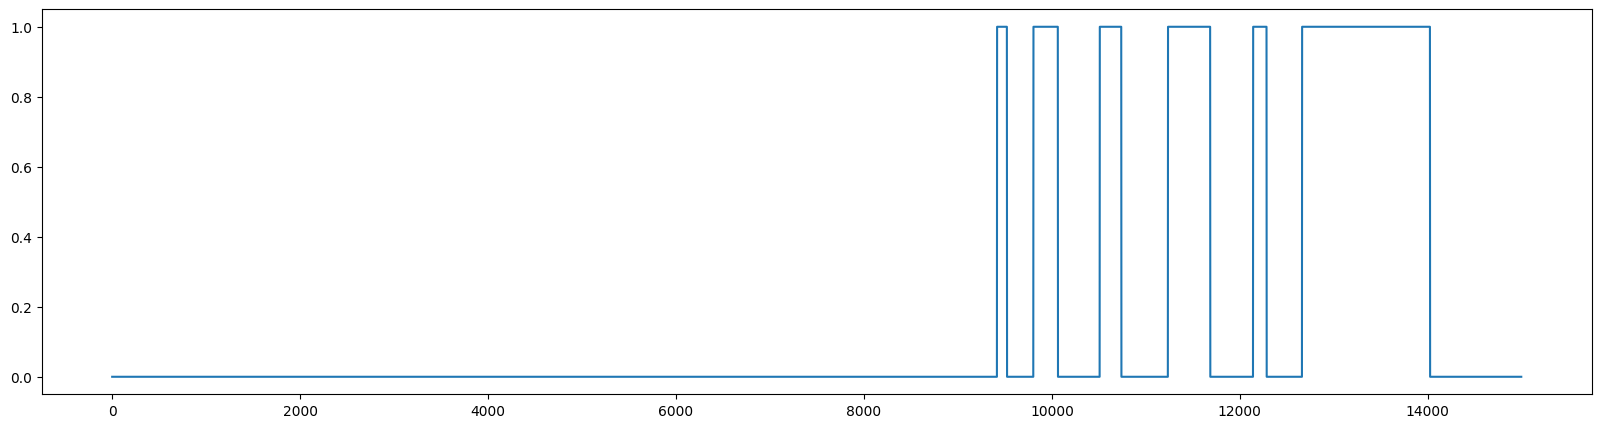

In [86]:
# plot labels
plt.figure(figsize=(20, 5))
plt.plot(labels)


In [102]:
n_steps = 60 # Par exemple, séquences de 60 pas de temps
X, y = [], []
for i in range(n_steps, labels.shape[0], n_steps):
    X.append(features_scaled[i-n_steps:i])
    if np.isin(1, labels[i-n_steps:i]):
        y.append(1)
    else:
        y.append(0)

X, y = np.array(X), np.array(y)

In [104]:
# keep 80% of the data for training and 20% for testing
n_train = int(X.shape[0] * 0.8)
X_train, X_test = X[:n_train], X[n_train:]

y_train, y_test = y[:n_train], y[n_train:]

In [105]:
X_train.shape, X_test.shape

((199, 60, 43), (50, 60, 43))

(array([179.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  20.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

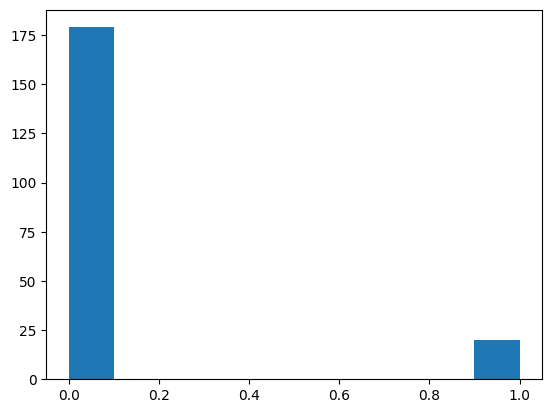

In [107]:
# give the proportion of attacks in the training and testing set
plt.hist(y_train)


In [74]:
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

n_input = X_train.shape[1]  # Longueur des séquences d'entrée
n_features = X_train.shape[2]  # Nombre de caractéristiques dans chaque pas de temps

model = Sequential()
# Encodeur
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(RepeatVector(n_input))  # Répète le contexte pour la longueur de la séquence de sortie

# Décodeur
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))  # Prédire chaque pas de temps et chaque caractéristique

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100)               57600     
                                                                 
 repeat_vector_2 (RepeatVec  (None, 60, 100)           0         
 tor)                                                            
                                                                 
 lstm_10 (LSTM)              (None, 60, 100)           80400     
                                                                 
 time_distributed_2 (TimeDi  (None, 60, 43)            4343      
 stributed)                                                      
                                                                 
Total params: 142343 (556.03 KB)
Trainable params: 142343 (556.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Outlier detection with Isolation forest.

Firstly we need to retrieve columns list which contain categorical data by checking if they do not contain float value or datetime.

In [9]:
is_float = lambda x: isinstance(x, float)
for col in full_df.columns:
  if col == 'Date':
    continue

  if full_df[col].apply(pd.to_numeric, errors='coerce').notna().all():
    full_df[col] = full_df[col].apply(pd.to_numeric, errors='coerce')

Isolation forest Algorithm is applied on categorical data with precising an `outliers_fraction` which represent the outlier rate in our dataset. To do so we just need to get the total count of attacks (labelled 1 data) and divide it by the total count.

With `get_list_of_if_outliers` implemented in previous practical sessions, we apply Isolation forest algorithm on categroical data. Then we will retrieve outliers indexes.

In [10]:
outlier_fraction = (full_df['Label'] == 1).sum() / len(full_df)
# attacked_columns = ['FIT 401', 'LIT 301', 'P601 Status', 'MV201', 'P101 Status', 'MV 501', 'P301 Status']
if_outlier_indexes = get_list_of_if_outliers(full_df.drop(columns=['Date', 'Attack', 'Label']), outlier_fraction, seed=35)

Let's compute accuracy by counting predicted outliers which are real outliers.

In [11]:
if_outliers = np.zeros(len(full_df))
if_outliers[if_outlier_indexes] = 1
full_df['if_outliers'] = if_outliers

attack_if_outliers = full_df[(full_df['if_outliers'] == 1) & (full_df['Label'] == 1)]
if_outliers_matches = len(attack_if_outliers)
print(f'{if_outliers_matches} outliers found with Isolation Forest are labeled as attacks')

877 outliers found with Isolation Forest are labeled as attacks


Then we compute F1 Score

In [12]:
print(classification_report(full_df['if_outliers'], full_df['Label']))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     12443
         1.0       0.34      0.34      0.34      2553

    accuracy                           0.78     14996
   macro avg       0.60      0.60      0.60     14996
weighted avg       0.78      0.78      0.78     14996



Let's now display confusion matrix.

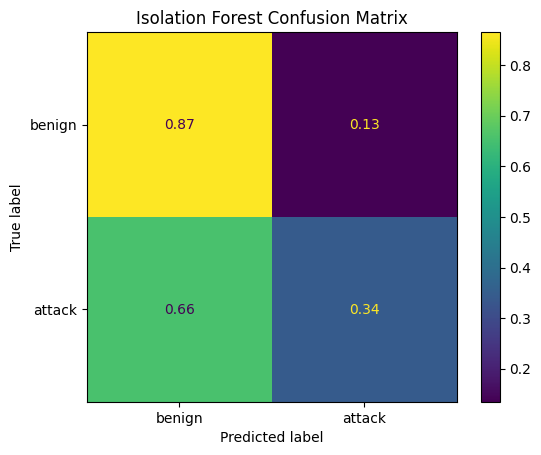

In [14]:
def confusion_matrix_plot(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred, normalize='true')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'attack'])
  disp.plot()
  plt.title(title)
  plt.show()

confusion_matrix_plot(full_df['if_outliers'], full_df['Label'], 'Isolation Forest Confusion Matrix')

From the results, we can see that the Isolation Forest algorithm is not much sensitive nor precise when detecting outliers.

In [15]:
full_df.to_csv('./data/clean_swat.csv')

## Outlier detection with LocalOutlierFactor

In [16]:
local_factor_outliers_indices = get_list_of_lof_outliers(full_df.drop(columns=['Date', 'Attack', 'Label']), outlier_fraction)

lof_outliers = np.zeros(len(full_df))
lof_outliers[local_factor_outliers_indices] = 1
full_df['lof_outliers'] = lof_outliers

In [17]:
attack_lof_outliers = full_df[(full_df['lof_outliers'] == 1) & (full_df['Label'] == 1)]
lof_outliers_matches = len(attack_lof_outliers)
print(f'{lof_outliers_matches} outliers found with Local Outlier Factor are labeled as attacks')

606 outliers found with Local Outlier Factor are labeled as attacks


In [18]:
print(classification_report(full_df['lof_outliers'], full_df['Label']))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     12443
         1.0       0.24      0.24      0.24      2553

    accuracy                           0.74     14996
   macro avg       0.54      0.54      0.54     14996
weighted avg       0.74      0.74      0.74     14996



Now we display the confusion matrix.

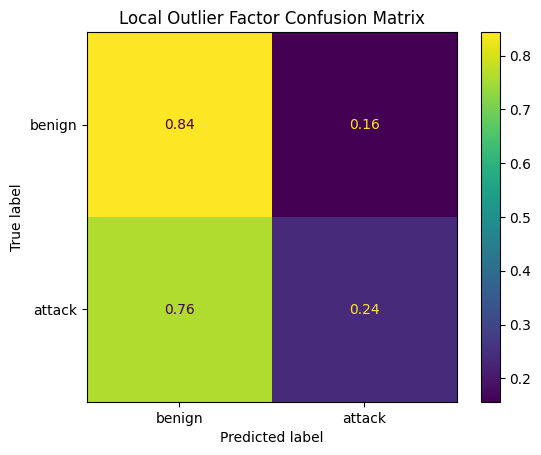

In [19]:
confusion_matrix_plot(full_df['lof_outliers'], full_df['Label'], 'Local Outlier Factor Confusion Matrix')

In comparison, as we can see from this report, LocalOutlierFactor algorithm is even less sensitive than the Isolation Forest algorithm.\
We can assume that an unsupervised algorithm may not be the best choice for this dataset.

We can now try to combine the results of the two algorithms to see if we can get better results.

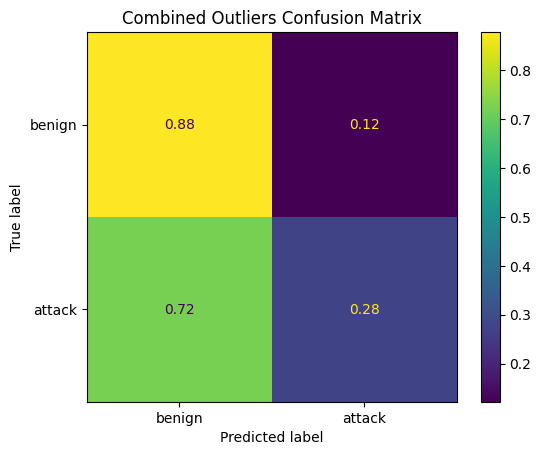

In [20]:
combined_outliers = np.zeros(len(full_df))
combined_outliers[if_outlier_indexes] = 1
combined_outliers[local_factor_outliers_indices] = 1

confusion_matrix_plot(combined_outliers, full_df['Label'], 'Combined Outliers Confusion Matrix')

## Classification

### Data preparation

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score, TimeSeriesSplit
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [23]:
seed: int = 42
one_hot_encoded_df = get_one_hot_encoded_dataframe(full_df.drop(columns=['Date', 'Attack', 'Label']))
no_nan_df = remove_nan_through_mean_imputation(one_hot_encoded_df)

### Random Forest Classifier

In [24]:
def gen_random_forest() -> RandomForestClassifier:
    return RandomForestClassifier(
        n_estimators=128,
        max_depth=9,
        max_features='sqrt',
        random_state=seed
    )

def cross_validate_model(X, y, model_gen, model_name, tscv) -> pd.DataFrame:
    res_total = pd.DataFrame()
    for (train_index, test_index) in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = model_gen()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        res = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True, zero_division=0))
        res_total = pd.concat([res_total, res[['weighted avg']]], axis=1)

    res_total = res_total.mean(axis=1).to_frame().T.drop(columns=['support'])
    res_total.index = [model_name]
    return res_total

In [25]:
X = no_nan_df.to_numpy()
y = full_df['Label'].to_numpy()

n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits, test_size=int(0.5 * X.shape[0] // n_splits))

cross_validate_model(X, y, gen_random_forest, 'Random Forest', tscv)

,precision,recall,f1-score
Random Forest,0.529652,0.65893,0.568958


#### Training with shuffled data

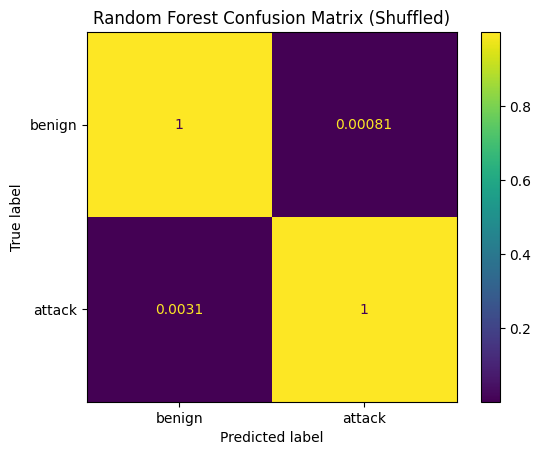

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
random_forest = gen_random_forest()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'Random Forest Confusion Matrix (Shuffled)')

#### Training with non-shuffled data

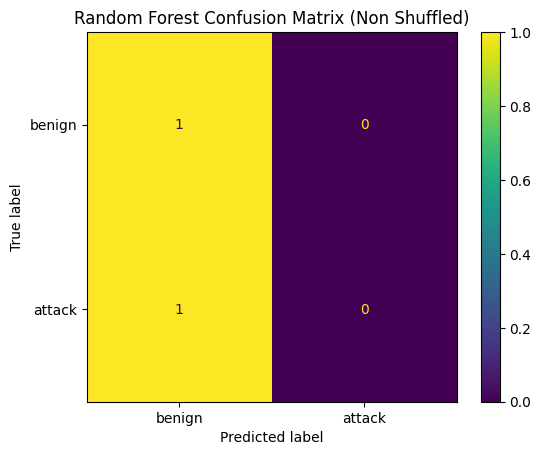

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
random_forest = gen_random_forest()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'Random Forest Confusion Matrix (Non Shuffled)')

### Decision Tree Classifier

In [21]:
def gen_decision_tree() -> DecisionTreeClassifier:
    return DecisionTreeClassifier(
        max_depth=9,
        max_features='sqrt',
        random_state=seed
    )

cross_validate_model(X, y, gen_decision_tree, 'Decision Tree', tscv)

,precision,recall,f1-score
Decision Tree,0.652433,0.657063,0.624606


#### Training with shuffled data

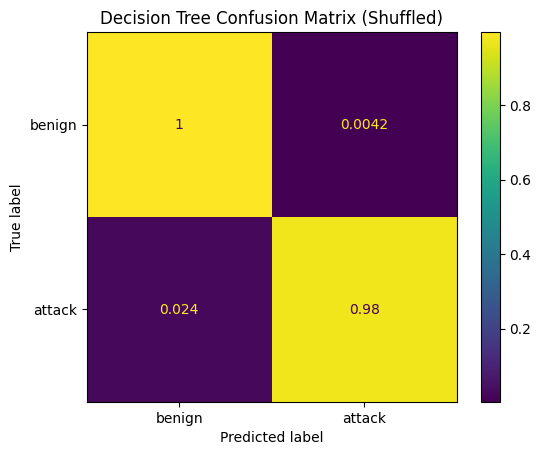

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
decision_tree = gen_decision_tree()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'Decision Tree Confusion Matrix (Shuffled)')

#### Training with non-shuffled data

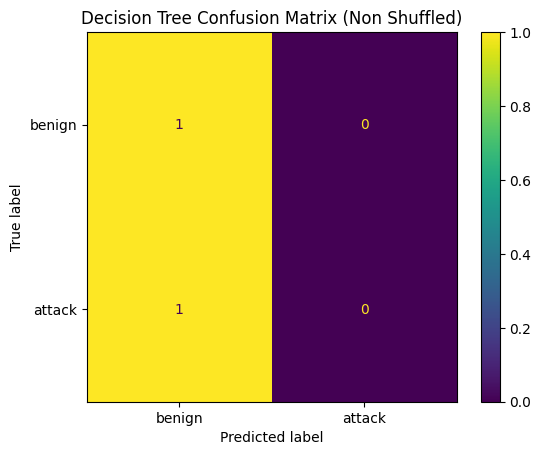

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
decision_tree = gen_decision_tree()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'Decision Tree Confusion Matrix (Non Shuffled)')

### XGBoost Classifier

In [24]:
def gen_XGBoostClassifier() -> XGBClassifier:
    return XGBClassifier(
        n_estimators=128,
        max_depth=7,
        learning_rate=1e-2,
        random_state=seed
    )

cross_validate_model(X, y, gen_XGBoostClassifier, 'XGBoost', tscv)

,precision,recall,f1-score
XGBoost,0.747405,0.793251,0.760983


#### Training with shuffled data

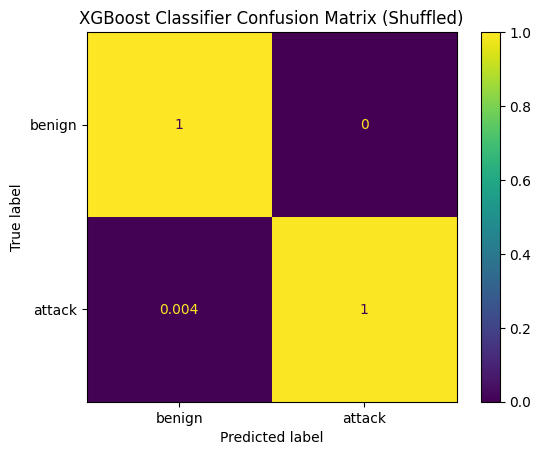

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
xgboost = gen_XGBoostClassifier()
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'XGBoost Classifier Confusion Matrix (Shuffled)')

#### Training with non-shuffled data

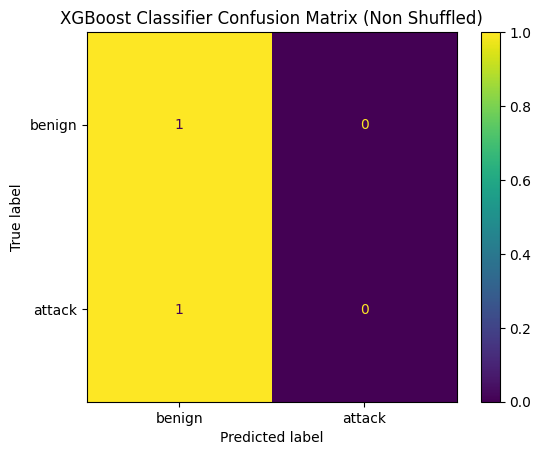

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
xgboost = gen_XGBoostClassifier()
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'XGBoost Classifier Confusion Matrix (Non Shuffled)')

### Multi-layer Perceptron Classifier

In [27]:
def gen_mlp() -> MLPClassifier:
    return MLPClassifier(
        hidden_layer_sizes=(256, 256),
        batch_size=32,
        learning_rate='adaptive',
        random_state=seed,
        early_stopping=True
    )

cross_validate_model(X, y, gen_mlp, 'MLP', tscv)

,precision,recall,f1-score
MLP,0.659396,0.700147,0.667445


#### Training with shuffled data

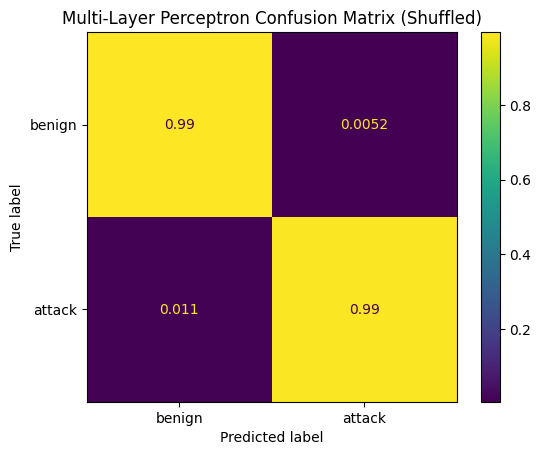

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
mlp = gen_mlp()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'Multi-Layer Perceptron Confusion Matrix (Shuffled)')

#### Training with non-shuffled data

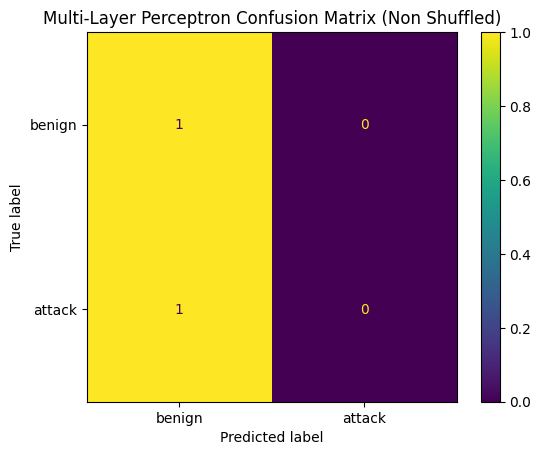

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
mlp = gen_mlp()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
confusion_matrix_plot(y_test, y_pred, 'Multi-Layer Perceptron Confusion Matrix (Non Shuffled)')